# Data Analysis and Visualization on Data Science andTech Salaries
#### Data is taken from kaggle.com

##  About Dataset

Context
62,000 salary records from top companies. This data was scraped off levels.fyi

Content
This dataset contains useful information such as education level, compensation (base salary, bonus, stock grants), race, and more.
Many sorts of analysis can be made from the information provided in the  dataset
The dataset only looks at companies and positions in the US alone. 

### Reasons for choosing this project
By analysing and visualizing Data Science and Tech Salaries datasets, these can help us understand the factors influencing salaries in these fields, the differences in compensation across different roles, the impact of education and experience on wages, among others. All these insights could guide both individuals and organizations in making informed decisions.

### Import necessary libraries

In [46]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import logging
import seaborn as sns
from IPython.display import display


### Read the data and save it to the dataframe salaries_df.
 Print out the first 5 lines of the dataframe

In [47]:
salary_df = pd.read_csv("/Users/lizzy/Documents/Python_lessons/python-intermediate-hybrid-main/lessons/Levels_Fyi_Salary_Data.csv")
#salary_df.head() #printing the first 5 rows for the dataset
   


I am extracting information from the dataset. I would like to know the shape, datatypes,columns and so on.

In [48]:
# Set up the logger
logging.basicConfig(filename=  'logfile.log', #name of the log file
                    filemode='w', #file mode used when opening the log file
                    level=logging.DEBUG,
                    format='%(asctime)s:%(levelname)s: %(message)s')

def log_message(level, msg):
    """
    Function to log a message at a specified level.
    Arguments:
    level -- String specifying the level ('debug', 'info', 'warning', 'error', 'critical')
    msg -- String containing the message to be logged
    """
    if level.lower() == 'debug':
        logging.debug(msg)
    elif level.lower() == 'info':
        logging.info(msg)
    elif level.lower() == 'warning':
        logging.warning(msg)
    elif level.lower() == 'error':
        logging.error(msg)
    elif level.lower() == 'critical':
        logging.critical(msg)
    else:
        raise ValueError(f'Invalid log level: {level}')



In [49]:
class dataf(pd.DataFrame):
    # inheriting directly from Dataframe and adding methods to it.
     def get_head(self):
        log_message('info', 'Getting first few rows of the dataframe.')
        return self.head()
    
     def get_shape(self):
        log_message('info', 'Getting shape of the dataframe.')
        return self.shape
    
     def has_duplicates(self):
        has_dupes = self.duplicated().any()
        if has_dupes:
            log_message('warning', 'Duplicates found in the dataframe.')
        else:
            log_message('info', 'No duplicates found in the dataframe.')
        return has_dupes
    
     def get_missing_values(self):
        log_message('info', 'Getting count of missing values in the dataframe.')
        return self.isna().sum()

     def get_dtype(self):
        log_message('info', 'Getting datatypes of the dataframe.')
        return self.dtypes

     def list_columns(self):
        log_message('info', 'Listing all columns of the dataframe.')
        return self.columns.tolist()
    
   

In [50]:
salary_df = dataf(salary_df)  # Convert salary_df to your custom DataFrame type

# Now you can use the additional methods you defined
#salary_df.info()

print("\nFirst 5 rows of the DataFrame:")
display(salary_df.get_head())

print("Shape of DataFrame:")
print(salary_df.get_shape())

print("Does the DataFrame have duplicated rows?")
print(salary_df.has_duplicates())


print("\nNumber of missing values in each column:")
print(salary_df.get_missing_values())

print("\nData types of columns:")
print(salary_df.get_dtype())

print("\nList of column names:")
print(salary_df.list_columns())





First 5 rows of the DataFrame:


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


Shape of DataFrame:
(62642, 29)
Does the DataFrame have duplicated rows?
False

Number of missing values in each column:
timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic        

I would like to reduce the number of columns and use the ones I only need 

In [51]:
salary_df = salary_df[['company', 'title', 'totalyearlycompensation','location',\
                               'yearsofexperience', 'yearsatcompany', 'gender','Race', 'Education']]
salary_df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,gender,Race,Education
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,NaN,NaN
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,NaN,NaN
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,NaN,NaN
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,NaN,NaN
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,NaN,NaN,NaN
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,NaN,NaN,NaN
62639,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,NaN,NaN,NaN
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,NaN,NaN,NaN


I am restricting my project on Tech jobs for  now so hence I removes these job which are unrelated to tech: Marketing, Mechanical Engineer, Sales, Recruiter, Human Resources

In [52]:
unrelated_titles = ['Marketing', 'Mechanical Engineer', 'Sales', 'Recruiter', 'Human Resources']
salary_df_original = salary_df.copy()
salary_df = salary_df[salary_df['title'].apply(lambda x: x not in unrelated_titles)]
salary_df.title.value_counts()

Software Engineer               41231
Product Manager                  4673
Software Engineering Manager     3569
Data Scientist                   2578
Hardware Engineer                2200
Product Designer                 1516
Technical Program Manager        1381
Solution Architect               1157
Management Consultant             976
Business Analyst                  885
Name: title, dtype: int64

As shown above there are NAN(not a number) in the dataset. I would like to find out and maybe make it more user-friendly. I first made some sort of DataFrame so the user-friendly part checks out and there I get the count of NaN.

In [53]:
null_df = pd.DataFrame(salary_df.isnull().sum(), columns = ['Count of NaN'])
null_df.index.name = 'Column'
null_df[null_df ['Count of NaN'] > 0].sort_values('Count of NaN', ascending=False)

,Count of NaN
Column,
Race,39006
Education,31244
gender,18552
company,5


As you can see, there are NaN in the race, education, gender and company columns, so I filled up the NaNs with the word "Unknown". 

In [54]:
salary_df = salary_df.fillna({'company':'Unknown', 'gender':'Unknown','Race': 'Unknown', 'Education': 'Unknown'})
salary_df


,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,gender,Race,Education
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,Unknown,Unknown,Unknown
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,Unknown,Unknown,Unknown
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,Unknown,Unknown,Unknown
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,Unknown,Unknown,Unknown
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...
62637,Google,Software Engineer,327000,"Seattle, WA",10.0,1.0,Unknown,Unknown,Unknown
62638,Microsoft,Software Engineer,237000,"Redmond, WA",2.0,2.0,Unknown,Unknown,Unknown
62639,MSFT,Software Engineer,220000,"Seattle, WA",14.0,12.0,Unknown,Unknown,Unknown
62640,Salesforce,Software Engineer,280000,"San Francisco, CA",8.0,4.0,Unknown,Unknown,Unknown


Check to see if everything is done, if yes the Data exploration and cleaning is done.

In [55]:
salary_df.isnull().sum()

company                    0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
gender                     0
Race                       0
Education                  0
dtype: int64

# Data Visualization
Data Analysis and visualization step

### Highest Salaries by Title

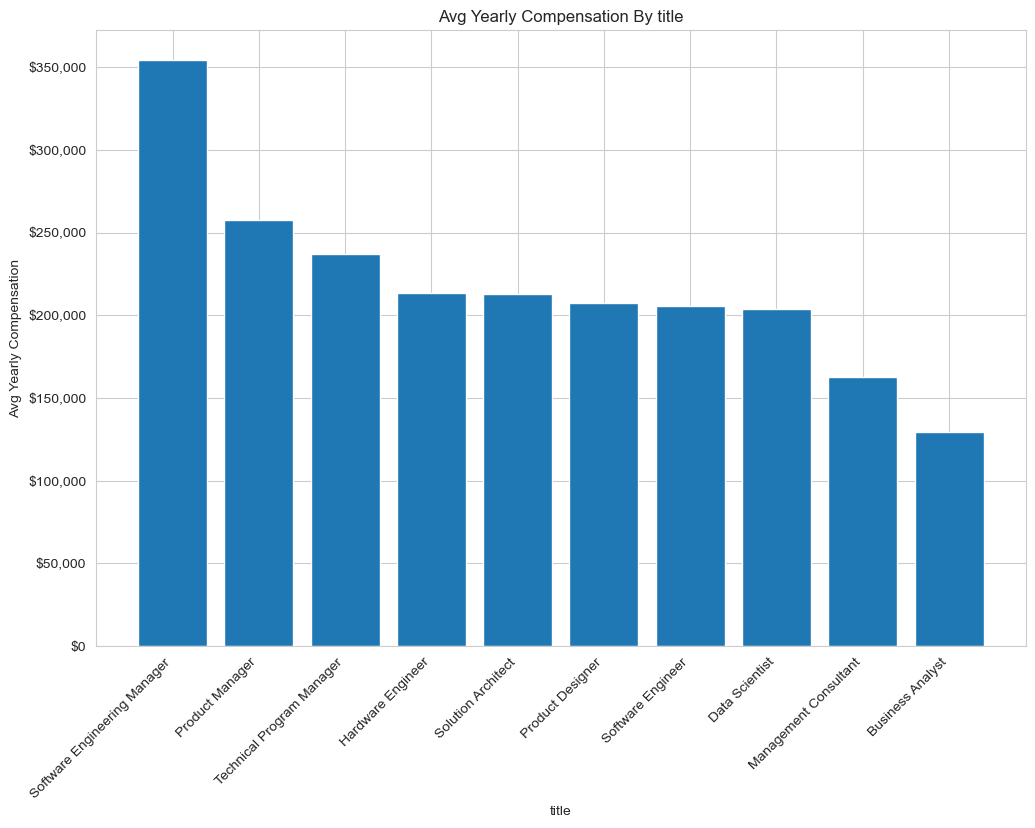

In [56]:

def plot_average_compensation(df, group_column, value_column, figsize=(12, 8)):
    # Group DataFrame by the specified column and compute the mean of the specified value
    grouped_values = df[[group_column, value_column]]\
        .groupby([group_column])\
        .mean()\
        .round(2)\
        .sort_values(value_column, ascending = False)
        
    fig, ax = plt.subplots(figsize=figsize)

    # Create a vertical bar plot
    ax.bar(grouped_values.index, grouped_values[value_column])

    # Set labels properties
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment='right')

    # Set labels and title of the plot
    ax.set(xlabel=group_column, ylabel='Avg Yearly Compensation', title=f'Avg Yearly Compensation By {group_column}')

    # Format y-axis as currency
    ax.yaxis.set_major_formatter('${x:1,.0f}')  

    # Show the plot
    plt.show()

# Usage of the function
plot_average_compensation(salary_df, 'title', 'totalyearlycompensation')


Software Engineering Manager had the highest average annual compensation, followed by Product Manager and Technical Program Manager.

### Next we would like to know the number of people in each job title 

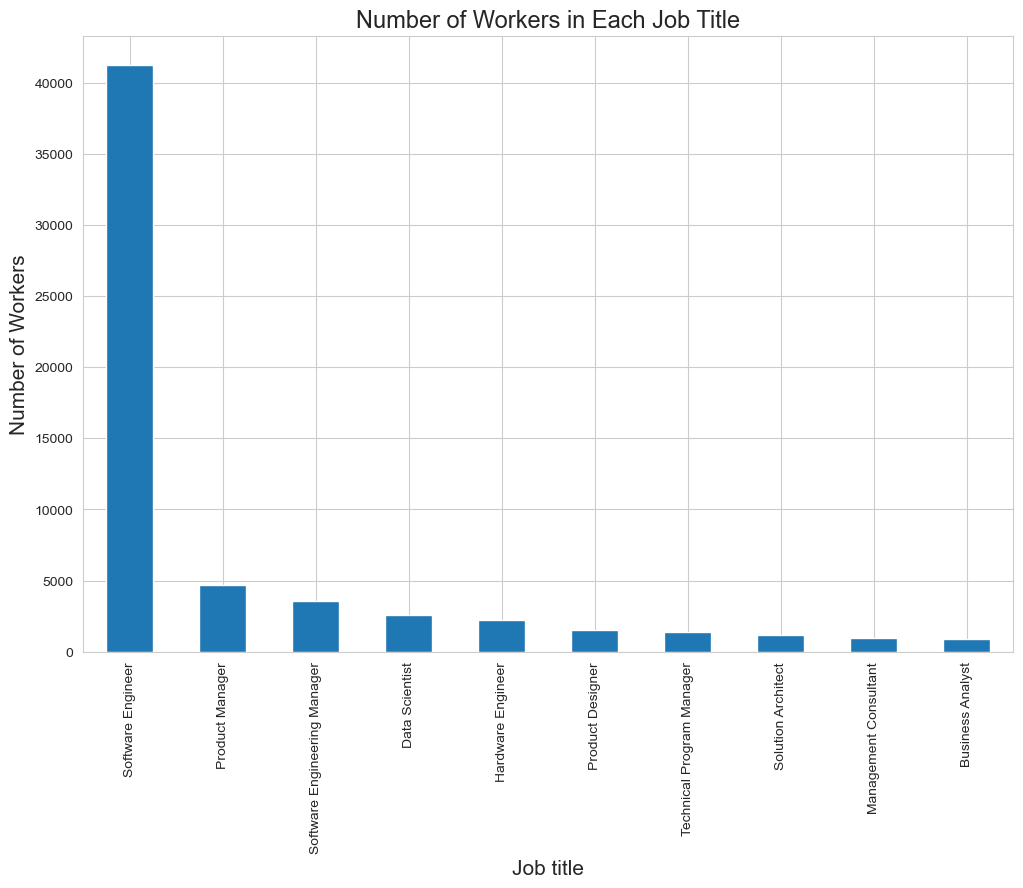

In [57]:
top_jobs = salary_df['title'].value_counts(ascending = False)
top_jobs.plot.bar(figsize = (12,8))
plt.title("Number of Workers in Each Job Title", size=17)
plt.xlabel('Job title', size = 15)
plt.ylabel('Number of Workers', size = 15)
plt.show();

The job title that appears most frequently is Software Engineer, with Product Manager and Software Engineering Manager coming next in terms of prevalence. It's observable that, on average, Software Engineering Managers earn the most, which can be attributed to their managerial responsibilities overseeing numerous Software Engineers.

### Let's extract the top 15 companies with the highest paying salaries

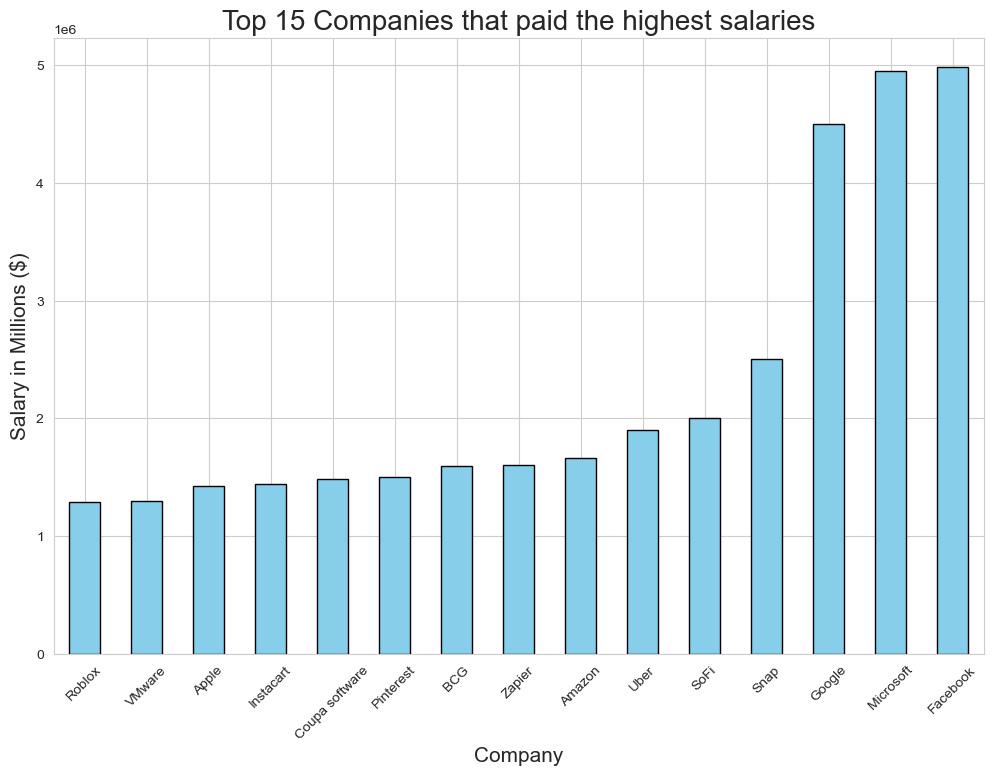

In [58]:
# Step 1: Grouping by 'company' and getting the max 'totalyearlycompensation' for each company
grouped_salary = salary_df.groupby('company')['totalyearlycompensation'].max()

# Step 2: Sorting the companies by 'totalyearlycompensation' in descending order and getting the top 15
top15_companies = grouped_salary.sort_values(ascending=False).head(15)

# Step 3: Sorting the top 15 companies in ascending order for the bar plot
top15_companies_sorted = top15_companies.sort_values()

# Step 4: Plotting the bar chart
#top15_companies_sorted.plot(kind='bar', figsize=(12,8))

# Step 5: Setting title and labels
#plt.title('Top 15 Companies that paid the highest salaries', size=17)
#plt.xlabel('company', size=15)
#plt.ylabel('Salary in Millions ($)', size=15)

# Step 6: Displaying the plot
#plt.show()




# Set the style
sns.set_style('whitegrid')

# Set the plot size
plt.figure(figsize=(12,8))

# Sort, and plot
top15_companies_sorted.plot(kind='bar', color='skyblue', edgecolor='black')

# Set labels and title
plt.title('Top 15 Companies that paid the highest salaries', fontsize=20, fontname='Arial')
plt.xlabel('Company', fontsize=15, fontname='Arial')
plt.ylabel('Salary in Millions ($)', fontsize=15, fontname='Arial')

# Tick parameters
plt.tick_params(axis='x', rotation=45)
plt.tick_params(axis='y', rotation=0)

# Show the plot
plt.show()


Facebook is the top payer in terms of annual salaries, with figures nearing $5 million. Following Facebook, Microsoft and Google also offer high yearly compensations, securing the next two spots on the list.

I would like to study the salaries based on gender. I would like to check the vaules on the gender column

In [59]:
salary_df['gender'].unique()

array(['Unknown', 'Male', 'Female', 'Other',
       'Title: Senior Software Engineer'], dtype=object)

There is an issue with because there is value that is not related to gender which is Senior Software Enginner and I w
would like to remove that and continue with the analysis

I will replace Senior Software Engineer with Unknown

In [60]:
salary_df['gender'] = salary_df['gender'].replace('Title: Senior Software Engineer', 'Unknown')
salary_df['gender'].unique()

array(['Unknown', 'Male', 'Female', 'Other'], dtype=object)

### Now Salaries by gender

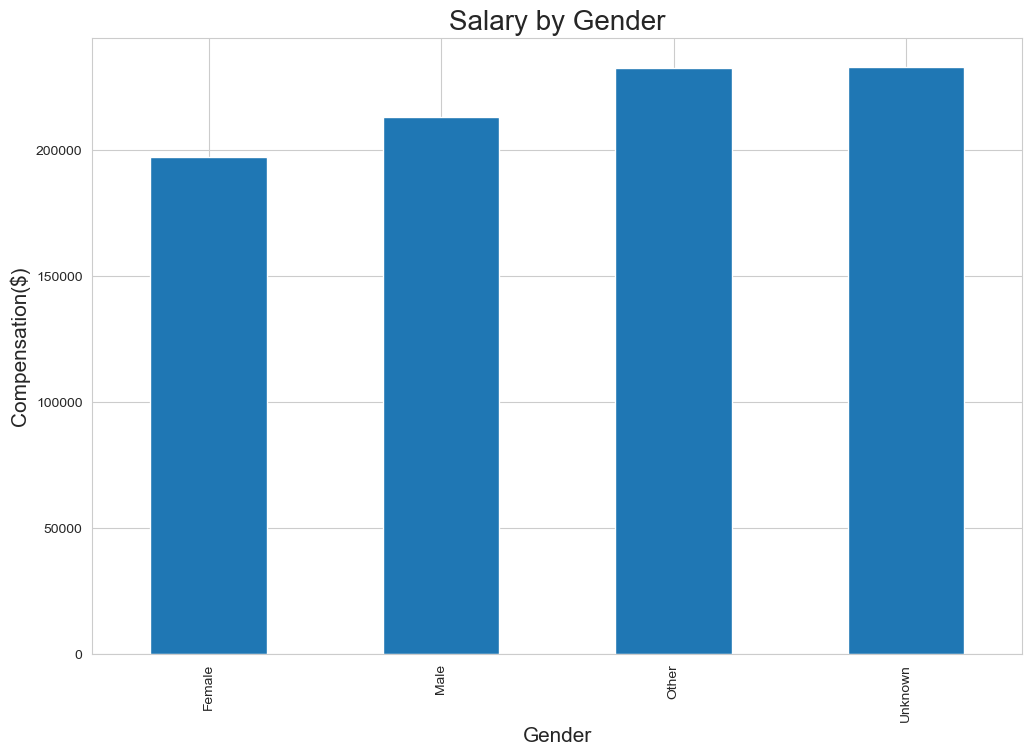

In [61]:
pay_by_gender =salary_df[['totalyearlycompensation', 'gender']].groupby(['gender']).mean().round(2)\
                                                                    .sort_values('totalyearlycompensation', ascending = False)\
                                                                    .head(15)\
                                                                    .sort_values('totalyearlycompensation', ascending = True)\
                                                                    .plot.bar(figsize = (12,8), legend = False);

plt.title('Salary by Gender', size=20)
plt.xlabel('Gender', size = 15)
plt.ylabel('Compensation($)', size = 15)
plt.show();

Looking at the available data, it appears that men typically earn more than women. However, it's important to note that there were 18,552 employees who either didn't specify their gender or identified as "other." This factor could potentially influence the overall results.

### Gender Distribution 

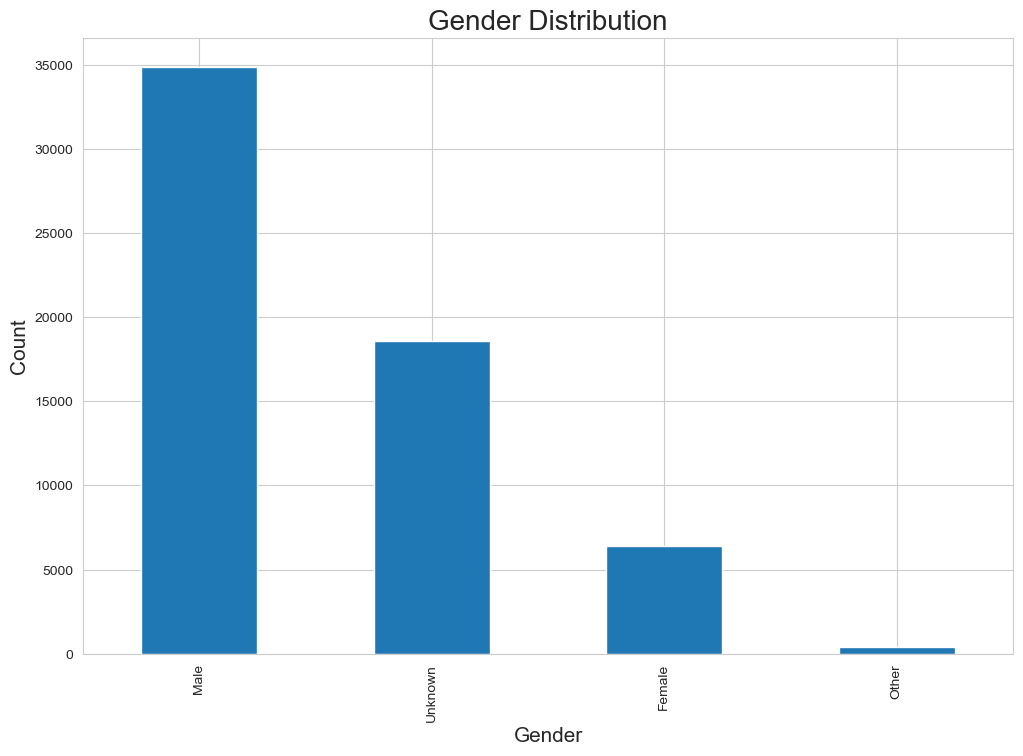

In [62]:
gender_distribution = salary_df['gender'].value_counts(ascending = False).plot.bar(figsize = (12,8));
plt.title('Gender Distribution', size=20)
plt.xlabel('Gender', size = 15)
plt.ylabel('Count', size = 15)
plt.show();

1. Men's average annual salaries are higher than women's, a phenomenon that could be attributed to the greater number of men in the workforce.
2. For every female employee in the tech industry, there were 20 male colleagues.
If the number of women was equal to men in this sector, it's possible that the average yearly earnings for women could surpass that of men.

However, it's important to keep in mind that roughly 18,552 workers did not disclose their gender. This absence of data might skew the results in one way or another.

### Salary by race 

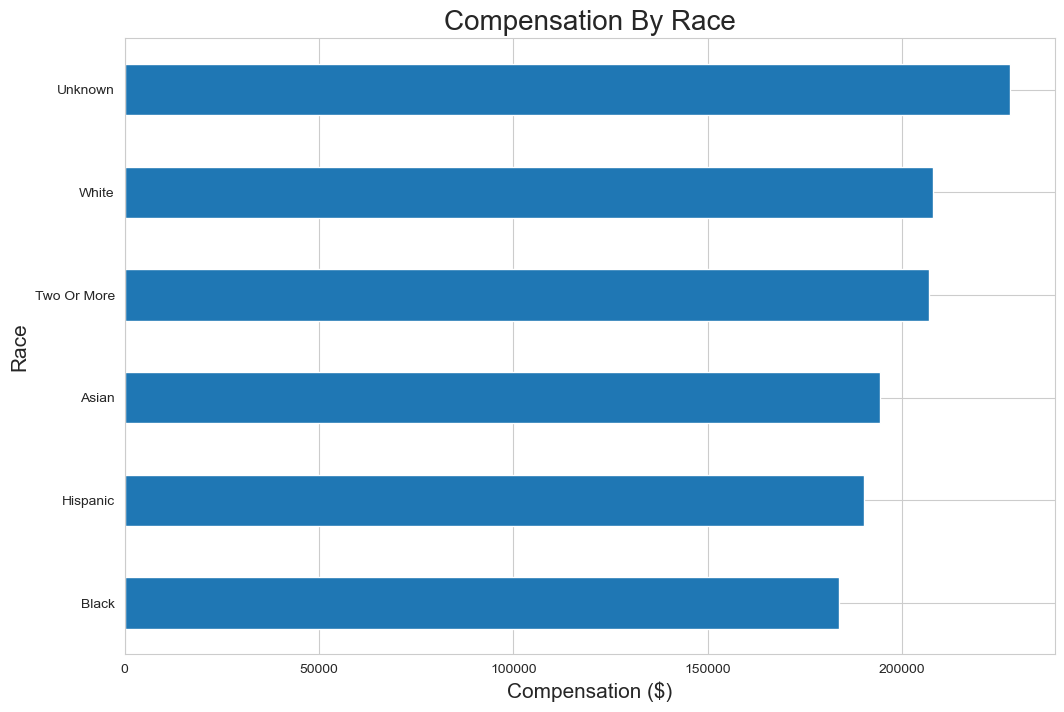

In [63]:
pay_by_race = salary_df[['totalyearlycompensation','Race']].groupby(['Race'])\
                                                               .mean()\
                                                               .round(2)\
                                                               .sort_values('totalyearlycompensation', ascending = True)\
                                                               .plot.barh(figsize = (12,8), legend = False)
plt.title('Compensation By Race', size=20)
plt.xlabel('Compensation ($)', size = 15)
plt.ylabel('Race', size = 15)
plt.show();

According to the data we have, White employees, on average, earn more than their Asian, Hispanic, Black, or multiracial counterparts. However, it's important to note that this analysis might not be entirely accurate as there were 39,006 respondents who didn't specify their racial background, potentially influencing the overall results.

###  The race distribution of the tech sector jobs

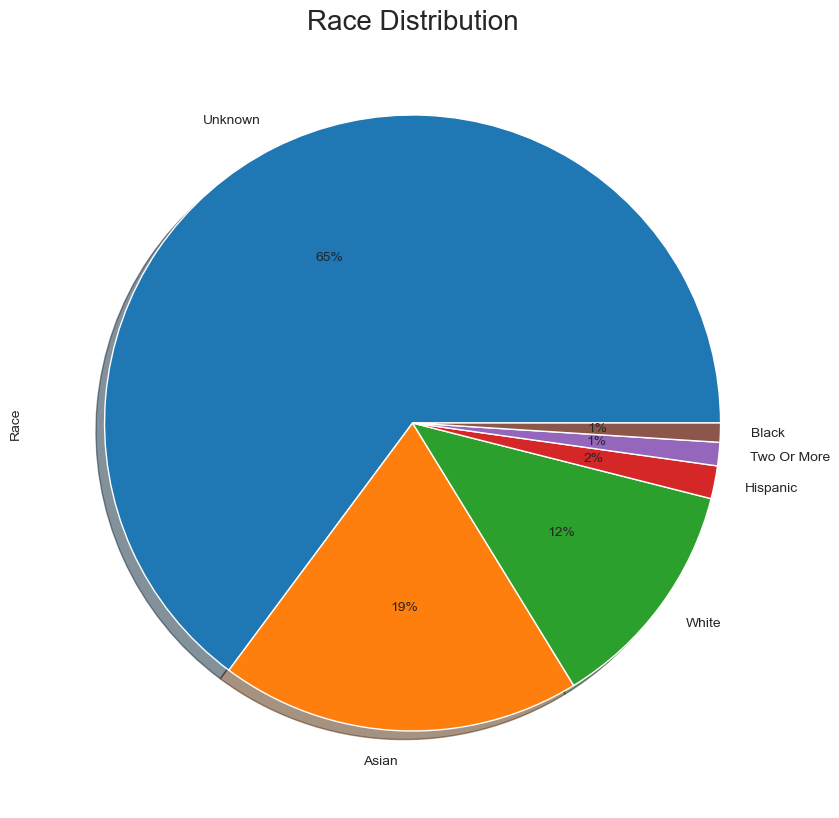

In [64]:
race_distribution = salary_df['Race'].value_counts().plot.pie(figsize = (12,10),label = 'Race', autopct='%.0f%%',radius=1,shadow=True);
plt.title('Race Distribution', size=20)
plt.show();

From the available data, we can see that despite the higher number of Asian employees, White workers are earning more on average. However, these findings should be interpreted with caution as 39,006 individuals didn't disclose their racial identity, which could potentially affect the overall interpretation of the results.

### Salary by education 

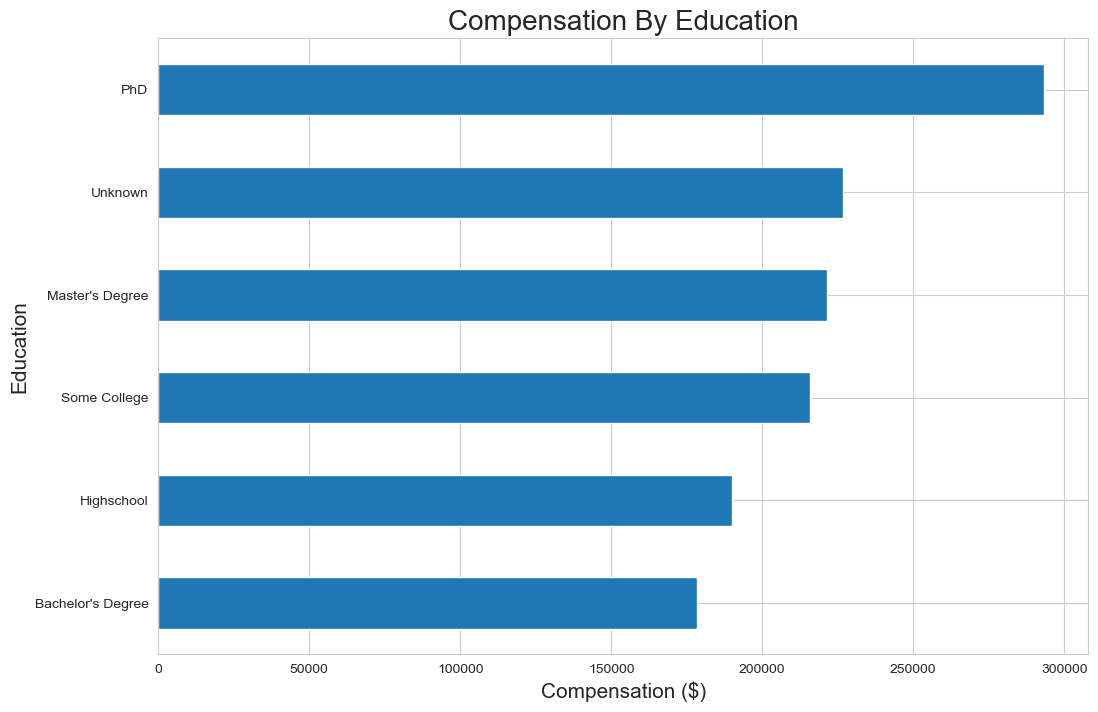

In [65]:
pay_by_education = salary_df[['totalyearlycompensation','Education']].groupby(['Education'])\
                                                                         .mean().round()\
                                                                         .sort_values('totalyearlycompensation', ascending = True)\
                                                                         .plot.barh(figsize = (12,8), legend = False)
plt.title('Compensation By Education', size=20)
plt.xlabel('Compensation ($)', size = 15)
plt.ylabel('Education', size = 15)
plt.show();

1.As anticipated, individuals holding PhDs earned the highest average salaries, with those possessing Master's Degrees coming in next.

2.Intriguingly, it was found that average incomes for high school graduates and individuals with some college education surpassed those of full college graduates. Several hypotheses might explain this observation:

a) The survey sample could have included a limited number of high school graduates and partially college-educated individuals, which might have inadvertently inflated their average salaries.

b) Some of these individuals might have opted for alternative education paths such as coding bootcamps or tech academies due to financial constraints on pursuing college. This could have bolstered their skill sets, practical experience, and marketability, thereby enhancing their earning potential.

c) There could be a subgroup of high school graduates or college dropouts who, confident in their self-learning abilities, opted out of formal higher education. By acquiring necessary skills and experience independently, they might have been able to boost their compensation significantly.

Although college graduates benefit from a comprehensive four-year education, their practical experience and marketability often remain untested until they enter the workforce, which could impact their initial earning capacity.








### The distribution of education  

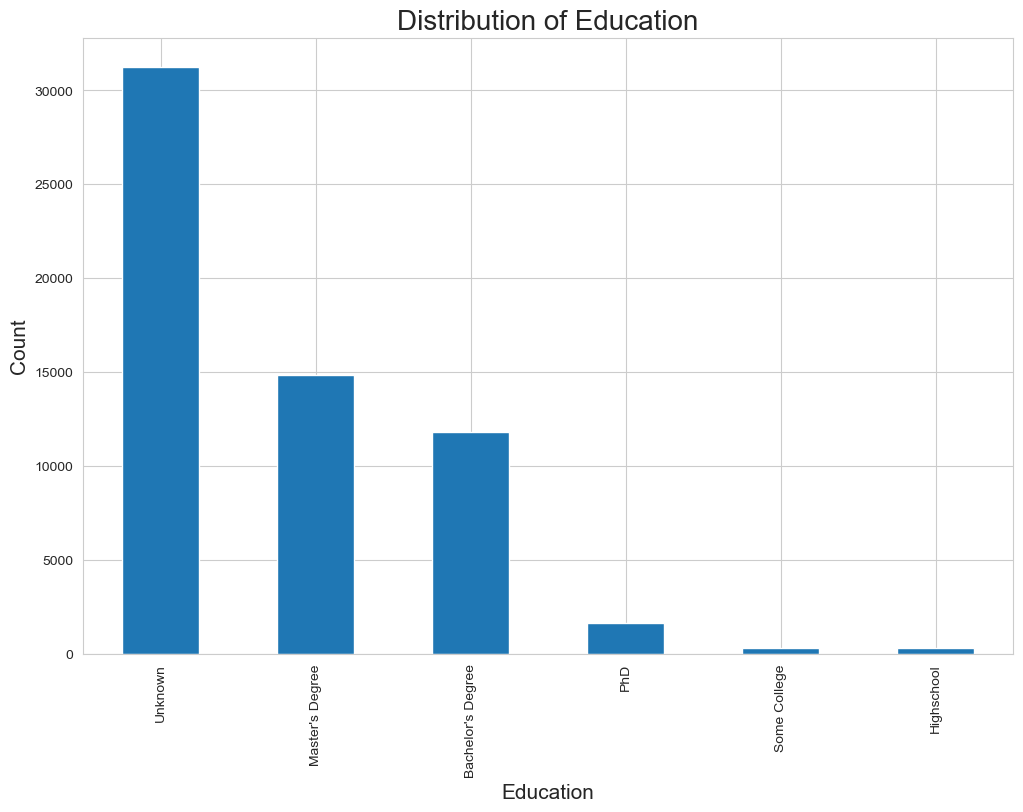

In [66]:
education_distribution = salary_df['Education'].value_counts(ascending = False).plot.bar(figsize = (12,8))
plt.title('Distribution of Education', size=20)
plt.xlabel('Education', size = 15)
plt.ylabel('Count', size = 15)
plt.show();

According to the accessible data, a large portion of the workforce holds either a Master's Degree (14,841 individuals) or a Bachelor's Degree (11,787 individuals). There are also workers with PhDs (1,662), some who attended some college (331), and others with high school diplomas (301). It's crucial to consider, however, that 31,244 employees did not disclose their educational qualifications, which might affect the overall understanding of the education distribution in the workforce.

### Is there a correlation  between salary and years of experience? 

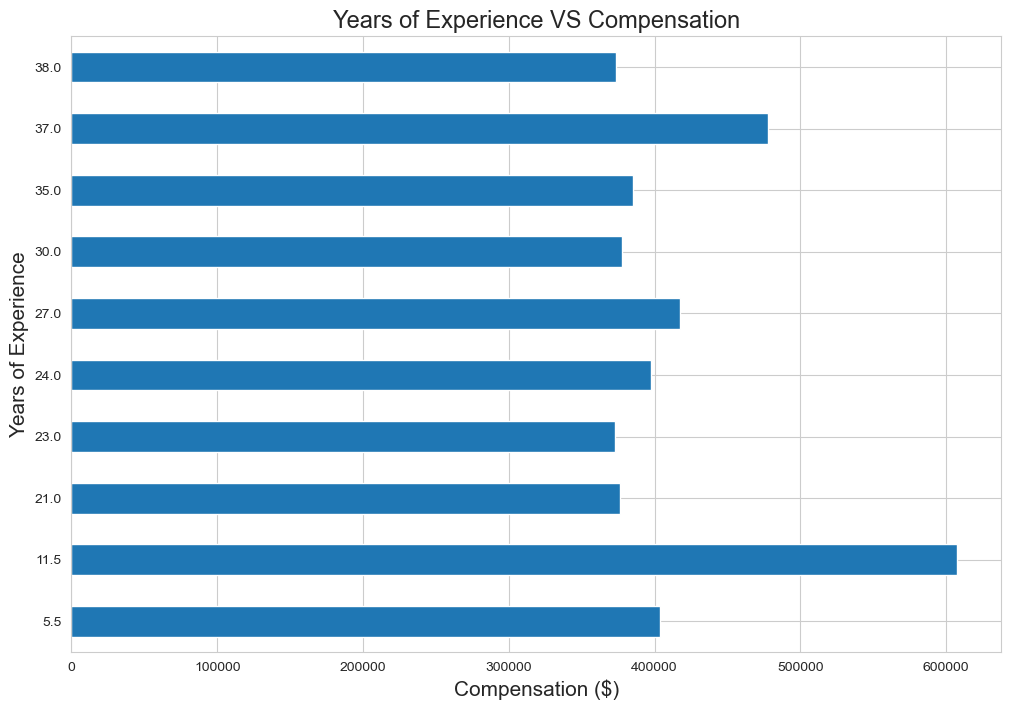

In [67]:
years_of_experience = salary_df[['totalyearlycompensation','yearsofexperience']].groupby(['yearsofexperience'])\
                                                                                             .mean()\
                                                                                             .round(2)\
                                                                                             .sort_values('totalyearlycompensation', ascending = False)\
                                                                                             .head(10)\
                                                                                             .sort_values('yearsofexperience', ascending = True)\
                                                                                             .plot.barh(figsize = (12,8),legend = False )
plt.title('Years of Experience VS Compensation', size=17)
plt.xlabel('Compensation ($)', size = 15)
plt.ylabel('Years of Experience', size = 15)
plt.show();


The data doesn't reveal a direct link between the length of professional experience and annual earnings. This suggests that in many firms, pay scales are predominantly merit-based. Given the rapid pace of technological advancements, it is critical for employees to continually enhance their skills - possibly through platforms like General Assembly - to stay relevant and competitive in the market.

### Challenges 
The main challenge was that the dataset had too many unknowns and hence I could not get 'more effective' analysis.
The idea of high school graduates earning more than Bachelor degree graduates baffled me and I would have liked to know more on the dataset.
Figuring out how the modules like class would be fit in a data analysis study was a bit confusing for me.
My plots were not nice lol

### Future work
Since the dataset was mainly  based on companies and employees in US , I would like to further maybe obtain a global dataset which can maybe offer more informative and interesting analysis such as , for example comparison between tech salaries between the same data science or tech jobs in the US and Europe, which continent offers the best salaries for males, females, LBGTO+ and also which continents is a safe heaven for earning high salaries regardless of their race.

# Conclusion
A large majority of data professionals have Masters degrees or higher. The salaries also correlate well with the level of education.
I think the US offers the highest salaries in correspondence of Data Science jobs as most of the heavyweight companies  are located there.